In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data\\steam-200k.csv', header=None)
data.columns = ["user_id", "game_title", "behavior_name", "value", "x"]
data.head()

,user_id,game_title,behavior_name,value,x
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [3]:
data = data.drop(['x'], axis=1)
data = data.drop_duplicates()
data.head()

,user_id,game_title,behavior_name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
data_games_group = data.groupby('game_title')
data_games_group.first()


,user_id,behavior_name,value
game_title,,,
007 Legends,46055854,purchase,1.0
0RBITALIS,86055705,purchase,1.0
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),65117175,purchase,1.0
10 Second Ninja,33013552,purchase,1.0
"10,000,000",33865373,purchase,1.0
...,...,...,...
sZone-Online,264253640,purchase,1.0
samurai_jazz,250375228,purchase,1.0
the static speaks my name,264253640,purchase,1.0


In [5]:
data['value'].describe()

count    199293.000000
mean         17.934247
std         138.297952
min           0.100000
25%           1.000000
50%           1.000000
75%           1.400000
max       11754.000000
Name: value, dtype: float64

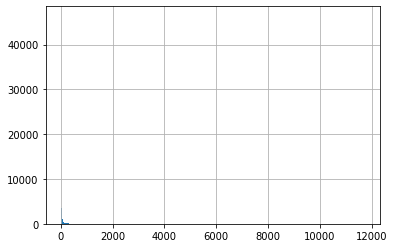

In [6]:
%matplotlib inline
data[data['value'] != 1.0]['value'].hist(bins=1000)

array([1.000000e-01, 1.175490e+03, 2.350880e+03, 3.526270e+03,
       4.701660e+03, 5.877050e+03, 7.052440e+03, 8.227830e+03,
       9.403220e+03, 1.057861e+04, 1.175400e+04])

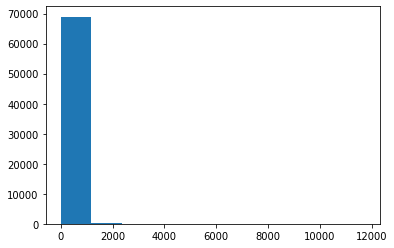

In [7]:
_, bins, _ = plt.hist(data[data['value'] != 1.0]['value'])
bins

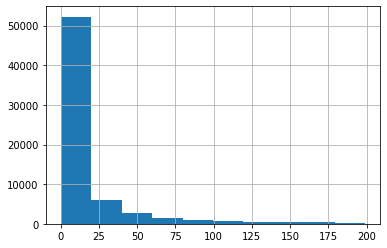

In [8]:
data[np.logical_and(data.value != 1.0, data.value < 200)]['value'].hist()

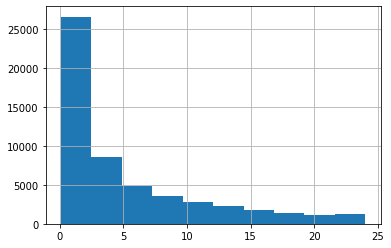

In [9]:
data[np.logical_and(data.value != 1.0, data.value < 25)]['value'].hist()

In [10]:
purchased = data[data['behavior_name'] == 'purchase']
purchased.loc[:, ['value']] = 1

played = data[data['behavior_name'] != 'purchase']
def convert_data_to_rating(value):
    if value > 1000:
        return 7
    if value > 200:
        return  6
    if value > 20:
        return 5
    if value > 5:
        return 4
    if value > 1:
        return 3
    return 2
played.loc[:, ['value']] = played['value'].map(convert_data_to_rating)
played['value'].append(purchased['value']).sort_index()

C:\Users\patrykj\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0         1
1         6
2         1
3         5
4         1
         ..
199995    3
199996    1
199997    3
199998    1
199999    3
Name: value, Length: 199293, dtype: int64

In [11]:
data_group_behaviour = data.copy()
data_group_behaviour['ratings'] = played['value'].append(purchased['value']).sort_index()

In [12]:
data_group_behaviour


,user_id,game_title,behavior_name,value,ratings
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,1
1,151603712,The Elder Scrolls V Skyrim,play,273.0,6
2,151603712,Fallout 4,purchase,1.0,1
3,151603712,Fallout 4,play,87.0,5
4,151603712,Spore,purchase,1.0,1
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,3
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,1
199997,128470551,Grand Theft Auto Vice City,play,1.5,3
199998,128470551,RUSH,purchase,1.0,1


In [13]:
data_group_behaviour.loc[:, ['user_id', 'game_title']].duplicated()

0         False
1          True
2         False
3          True
4         False
          ...  
199995     True
199996    False
199997     True
199998    False
199999     True
Length: 199293, dtype: bool

In [14]:
sorted_d = data_group_behaviour.sort_values(by=['user_id', 'game_title', 'behavior_name'])

In [15]:
data.sort_values(by=['behavior_name'])[data_group_behaviour.sort_values(by=['behavior_name']).loc[:, ['user_id', 'game_title']].duplicated()]

,user_id,game_title,behavior_name,value
64738,71411882,Grand Theft Auto III,play,0.2
74679,33865373,Sid Meier's Civilization IV,play,2.0
166995,59925638,Tom Clancy's H.A.W.X. 2,play,7.1
170263,148362155,Grand Theft Auto San Andreas,play,12.5
56945,50769696,Grand Theft Auto San Andreas,play,10.9
...,...,...,...,...
81221,101000574,BLOCKADE 3D,purchase,1.0
81191,239389313,TERA,purchase,1.0
81188,250357493,Team Fortress 2,purchase,1.0
81186,250357493,No More Room in Hell,purchase,1.0


In [16]:
data_group_behaviour[np.logical_and(data_group_behaviour.user_id == 228908339, data_group_behaviour.game_title == 'Grand Theft Auto V')]

,user_id,game_title,behavior_name,value,ratings
19078,228908339,Grand Theft Auto V,purchase,1.0,1
19079,228908339,Grand Theft Auto V,play,93.0,5


In [17]:
purchased_played = sorted_d[sorted_d.loc[:, ['user_id', 'game_title']].duplicated()]

In [18]:
final_data = pd.concat([data_group_behaviour, purchased_played]).drop_duplicates(keep=False)

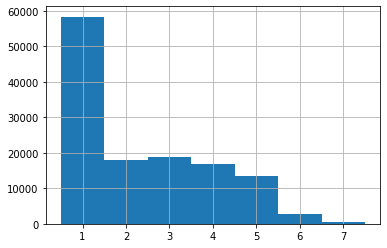

In [19]:
final_data['ratings'].hist(bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

In [26]:
game_features = final_data.pivot(
    index='user_id',
    columns='game_title',
    values='ratings'
).fillna(0)

from scipy.sparse import csr_matrix
game_features_matrix = csr_matrix(game_features.values)
game_features_matrix


from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(game_features_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)

In [ ]:
# from fuzzywuzzy import fuzz
game = 'fallout'
matches = []
all_games = game_features.index.values
for c_game in all_games:
    ratio = fuzz.ratio(game.lower(), c_game.lower())
    if ratio >= 60:
        matches.append((c_game, ratio))
        # break
# if len(matches)>1:
match_tuple = sorted(matches, key=lambda x: x[1])[::-1]
if not match_tuple:
    print('Oops! No match is found')
else:
    print('Found possible matches in our database: '
                      '{0}\n'.format([x[0] for x in match_tuple]))
    match = match_tuple[0][0]


In [27]:
n_recommendations = 10
match = 71411882
idx = game_features.index.get_loc(match)
distances, indices = model_knn.kneighbors(
            game_features_matrix[idx],
            n_neighbors=n_recommendations+1)
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[:0:-1]

In [28]:
for i, (idx, dist) in enumerate(raw_recommends):
            print('{0}: {1}, with distance '
                  'of {2}'.format(i+1, game_features.index[idx], dist))

1: 174033209, with distance of 0.6541039767145349
2: 273597380, with distance of 0.6540042134023747
3: 129162036, with distance of 0.6529715796300248
4: 131386705, with distance of 0.648508656654981
5: 161211955, with distance of 0.6445838710568867
6: 216261706, with distance of 0.6382771321933918
7: 90878103, with distance of 0.6373148952076548
8: 13556140, with distance of 0.6282376370978612
9: 40280688, with distance of 0.5756435325545981
10: 156426681, with distance of 0.5377551757712142
